In [1]:
%pylab inline
from pyspark.sql.types import *

hc = HiveContext(sc)

Populating the interactive namespace from numpy and matplotlib


In [2]:
acs = hc.sql("SELECT OutputAreaClassificationName AS Classification, COUNT(1) AS PostcodeCount FROM Postcodes GROUP BY OutputAreaClassificationName")
acs.cache()

DataFrame[Classification: string, PostcodeCount: bigint]

In [4]:
p_acs = acs.toPandas()
p_acs.sort('PostcodeCount', ascending=0)[:15]

,Classification,PostcodeCount
7,Self-sufficient retirement,75577
21,Rural white-collar workers,70876
49,White suburban communities,67820
57,White professionals,58824
50,Rural life,54232
56,Families in terraces and flats,50524
18,Detached retirement living,48311
68,Semi-detached ageing,46526
2,Communal retirement,45784
24,Multi-ethnic professionals with families,45653


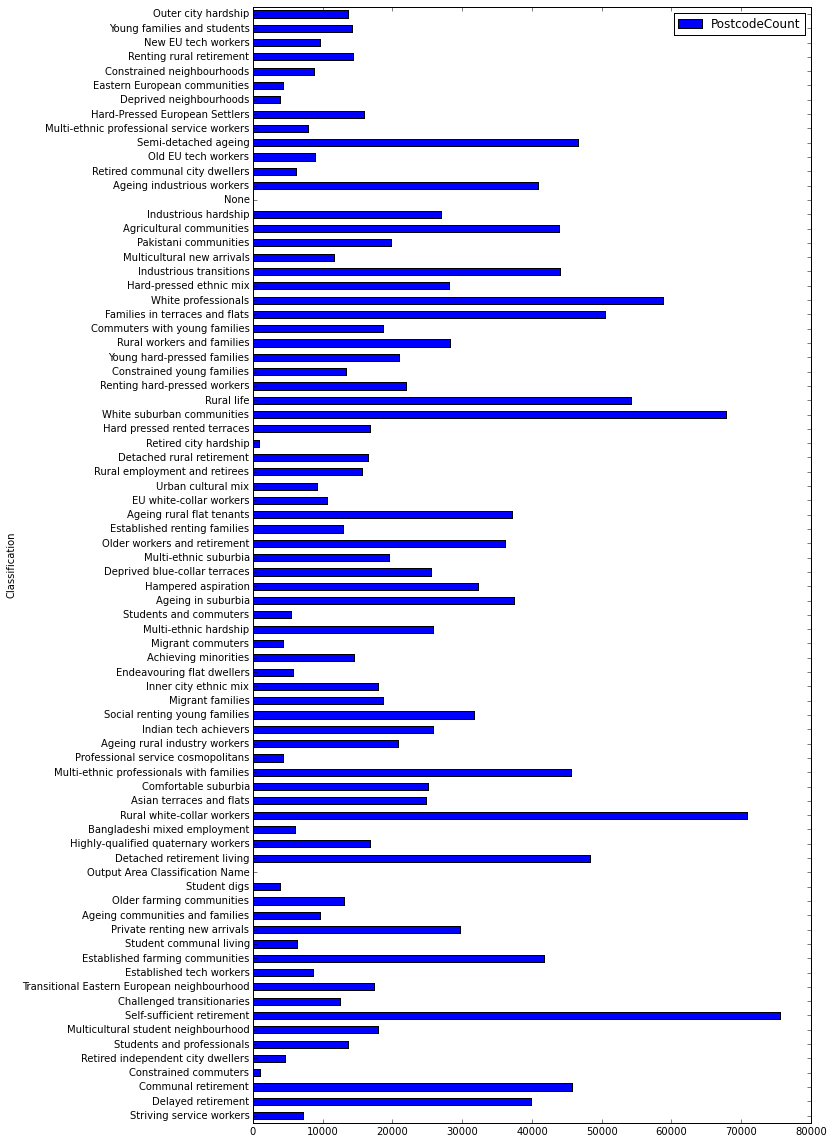

In [5]:
p_acs.plot(x='Classification', y='PostcodeCount', kind='barh', figsize=[10,20])

In [6]:
all_postcodes = hc.sql("SELECT Postcode3 AS Postcode, OutputAreaClassificationName AS Classification FROM Postcodes WHERE Postcode3 IS NOT NULL")
all_postcodes.cache()

DataFrame[Postcode: string, Classification: string]

In [7]:
all_postcodes.first()

Row(Postcode=u'Postcode 3', Classification=u'Output Area Classification Name')

In [11]:
all_postcodes.where(all_postcodes.Postcode == "PL21 9TY").first().Classification

u'White suburban communities'